In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request

In [68]:
years = [2019, 2023]
url_raw = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear="

In [69]:
def process_year_data(year):
    file_name = f"checkouts{year}_file.csv"
    urllib.request.urlretrieve(f"{url_raw}{year}", file_name)
    df = pd.read_csv(file_name)
    mediatype_df = df["materialtype"].value_counts()
    mediatype_df.to_csv(f"materialtype{year}.csv")
    excluded_types = ["CR", "REGPRINT", "MAGAZINE", "SOUNDREC", "VIDEO"]
    mediatype_df = mediatype_df.drop(excluded_types, errors='ignore')
    return mediatype_df

In [70]:
mediatypes =[]
for year in years:
    mediatype = process_year_data(year)
    mediatypes.append(mediatype)

In [71]:
mediatype_all = pd.concat(mediatypes, axis=1, ignore_index=True)
mediatype_all.columns = [str(year) for year in years]

Text(0.5, 1.0, 'Ausleihzahlen nach Medienart')

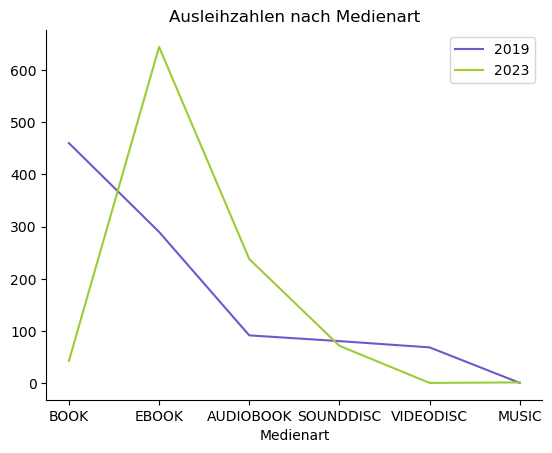

In [72]:
mediatype_all.plot(color=['slateblue', 'yellowgreen'])
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend([str(year) for year in years])
plt.xlabel('Medienart')
plt.ylabel('Ausleihzahlen')
plt.title('Ausleihzahlen nach Medienart')

Text(0.5, 1.0, 'Ausleihzahlen nach Medienart')

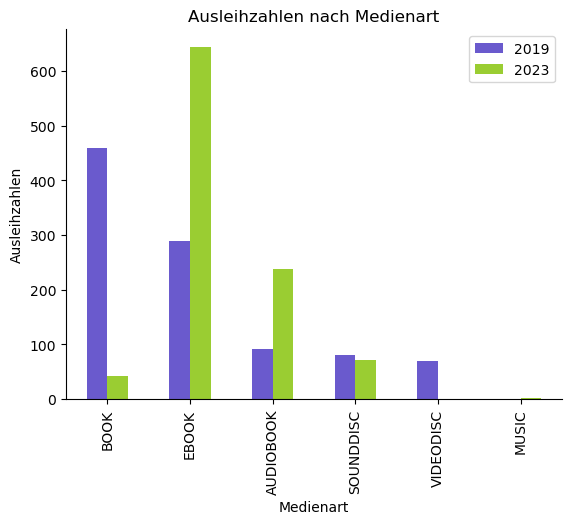

In [74]:
mediatype_all.plot(color=['slateblue', 'yellowgreen'], kind="bar")
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend([str(year) for year in years])
plt.xlabel('Medienart')
plt.ylabel('Ausleihzahlen')
plt.title('Ausleihzahlen nach Medienart')